In [113]:
#reference


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR

In [2]:
def low_rank_approximate(A,k=2):
    u, d, v = np.linalg.svd(A, full_matrices=1)
    A_k = np.zeros((len(u), len(v)))
    for i in range(k):
        A_k += d[i] * np.outer(u.T[i], v[i])
        #A_k+=np.reshape(u[:,i],(60))
    return A_k

In [3]:
test_file = './ml20.test'
train_file = './ml80.train'
test_read = open(test_file, 'r')
test = test_read.readlines()
test_read.close()
#print(np.array(test).shape)
test = np.array([np.int64(i.split()) for i in test])

In [4]:
test.shape

(20000, 3)

In [5]:
test[:10]

array([[ 1,  5,  3],
       [ 1, 11,  2],
       [ 1, 16,  5],
       [ 1, 25,  4],
       [ 1, 35,  1],
       [ 1, 41,  2],
       [ 1, 45,  5],
       [ 1, 46,  4],
       [ 1, 48,  5],
       [ 1, 50,  5]])

In [6]:
train_read = open(train_file, 'r')
train = np.array([np.int64(i.split()) for i in train_read.readlines()])
print(train.shape)

(80000, 3)


In [7]:
train[:10]

array([[ 1,  1,  5],
       [ 1,  2,  3],
       [ 1,  3,  4],
       [ 1,  4,  3],
       [ 1,  6,  5],
       [ 1,  7,  4],
       [ 1,  8,  1],
       [ 1,  9,  5],
       [ 1, 10,  3],
       [ 1, 12,  5]])

In [8]:
max(train[:,0]), max(train[:,1])

(943, 1682)

In [9]:
max(test[:,0]), max(test[:,1])

(877, 1669)

In [10]:
min(test[:,0]), min(test[:,1])

(1, 1)

In [11]:
train_matrix = np.zeros((943, 1682))
#test_matrix = np.zeros((877, 1682))

In [12]:
for i in train:
    train_matrix[np.int64(i[0])-1][np.int64(i[1])-1] = i[2]

#### Matrix Representation of Train Set

In [13]:
train_matrix[:20], train_matrix.shape

(array([[5., 3., 4., ..., 0., 0., 0.],
        [4., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [5., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [3., 0., 0., ..., 0., 0., 0.]]), (943, 1682))

#### K Rank Approximation of train_matrix ( K = 10 )

In [14]:
pred = low_rank_approximate(train_matrix, k = 10)

In [62]:
pred[:10], pred.shape

(array([[ 3.58367040e+00,  1.86015182e+00,  1.18017426e+00, ...,
         -8.78319181e-03,  2.46557585e-02,  7.92257820e-02],
        [ 1.26403224e+00, -1.40492975e-01,  2.14726929e-01, ...,
          1.61007603e-02, -4.48077499e-03, -1.72647274e-03],
        [-5.55885939e-02, -3.61743334e-02,  4.38054237e-02, ...,
          2.47474709e-02, -4.83731919e-03, -1.72150378e-02],
        ...,
        [ 1.23370932e+00,  1.18497849e+00, -1.11803511e-01, ...,
          1.94068599e-03,  3.05896480e-02,  1.94132038e-02],
        [ 6.57300255e-01, -1.08406906e-01,  2.07273381e-02, ...,
          3.23677051e-03, -2.09784071e-03, -7.68004074e-03],
        [ 1.22082434e+00,  2.45722609e-01,  2.67884285e-01, ...,
          7.06503904e-04,  1.07101355e-02,  2.39262377e-04]]), (943, 1682))

### Error with varying K rank approximation

In [16]:
def error(k, test):
    Pred = low_rank_approximate(train_matrix, k = k)
    err = 0
    for i, j, S in test:
        err += (S - Pred[int(i-1)][int(j-1)])**2
    return err

In [17]:
errors = []
k = list(range(101))
for i in k:
    errors.append(error(i, test))

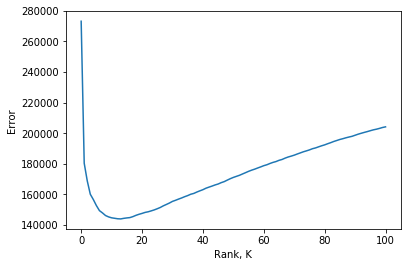

In [63]:
plt.plot(k, errors)
plt.xlabel("Rank, K")
plt.ylabel("Error")
plt.show()

#### The optimum value of K is ~13

In [68]:
errors.index(min(errors)) #the K for min error

13

### Using Baseline Algorithm

In [24]:
u = []  #average rating of user i
n = []  #average rating of movie j

for  i in range(len(train_matrix)):
    u.append(sum(train_matrix[i])/1682)
    
for j in range(len(train_matrix[0])):
    n.append(sum(train_matrix[:,j])/943)
u,n = np.array(u),np.array(n)
u.shape, n.shape

((943,), (1682,))

In [49]:
X = []
y = []
for i, j, r in train:
    X.append([u[i-1], n[j-1]])
    y.append(train_matrix[i-1][j-1])
X=np.array(X)
y=np.array(y)
lr = LR(fit_intercept=False)
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [55]:
lr.coef_, lr.intercept_ #alpha and beta

(array([4.54541877, 2.77493657]), 0.0)

In [51]:
alpha, beta = lr.coef_

In [52]:
baseline_test = []   #new test data with baseline algorithm
baseline_error = 0
for i,j, r in test:
    y_ = alpha*u[i-1] + beta*n[j-1]
    baseline_test.append([i,j,y_])
    baseline_error += (y_-train_matrix[i-1][j-1])**2
baseline_test=np.array(baseline_test)

In [36]:
errors_ = []
k = list(range(101))
for i in k:
    errors_.append(error(i, baseline_test))

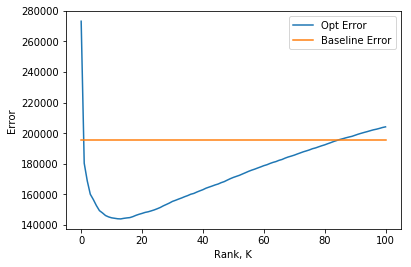

In [59]:
plt.plot(k, errors, label = "Opt Error")
plt.xlabel("Rank, K")
plt.ylabel("Error")
plt.plot(k, [baseline_error]*101, label = 'Baseline Error')
plt.legend()
plt.show()

#### Clearly the error values in this baseline formulation are much higher than that in the previous plot